In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs_Python\Projects\Churn_prediction\NoteBook\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(7032, 21)

In [12]:
data.drop('customerID', axis=1,inplace=True)

In [13]:
df = data.copy()

In [14]:
category_feature = df.select_dtypes(include=['object']).columns.tolist()
numerical_feature = df.select_dtypes(include=['int']).columns.tolist()
continue_feature = df.select_dtypes(include=['float']).columns.tolist()

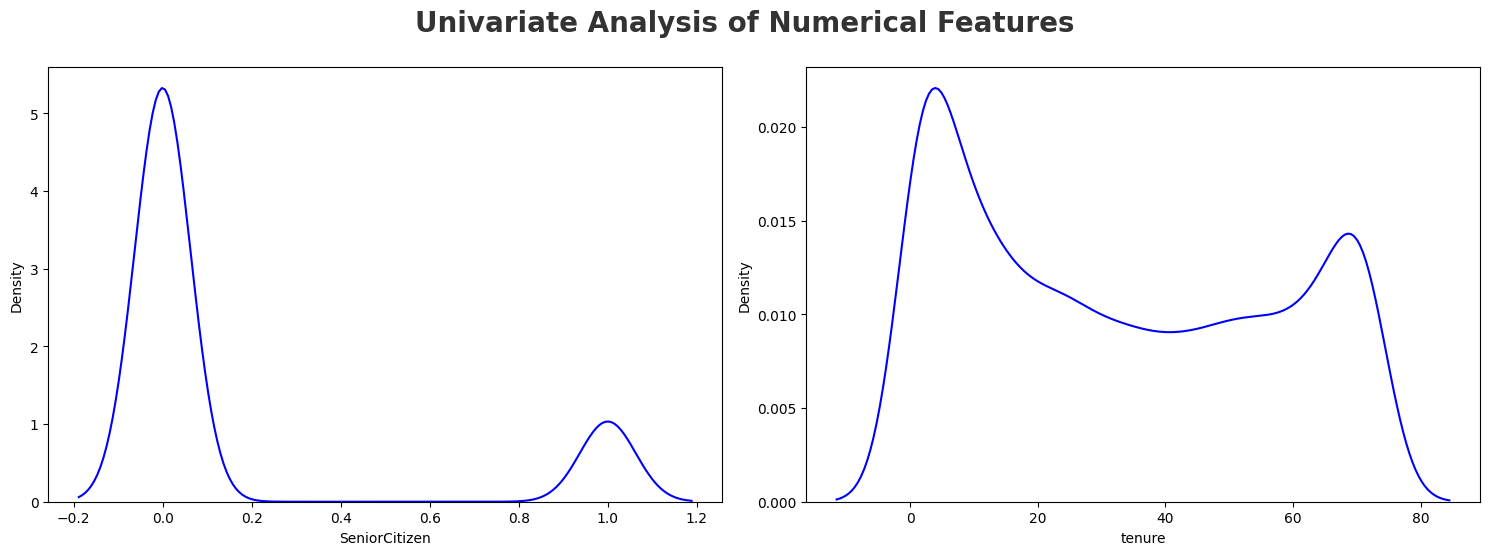

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_feature[i]], color='blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

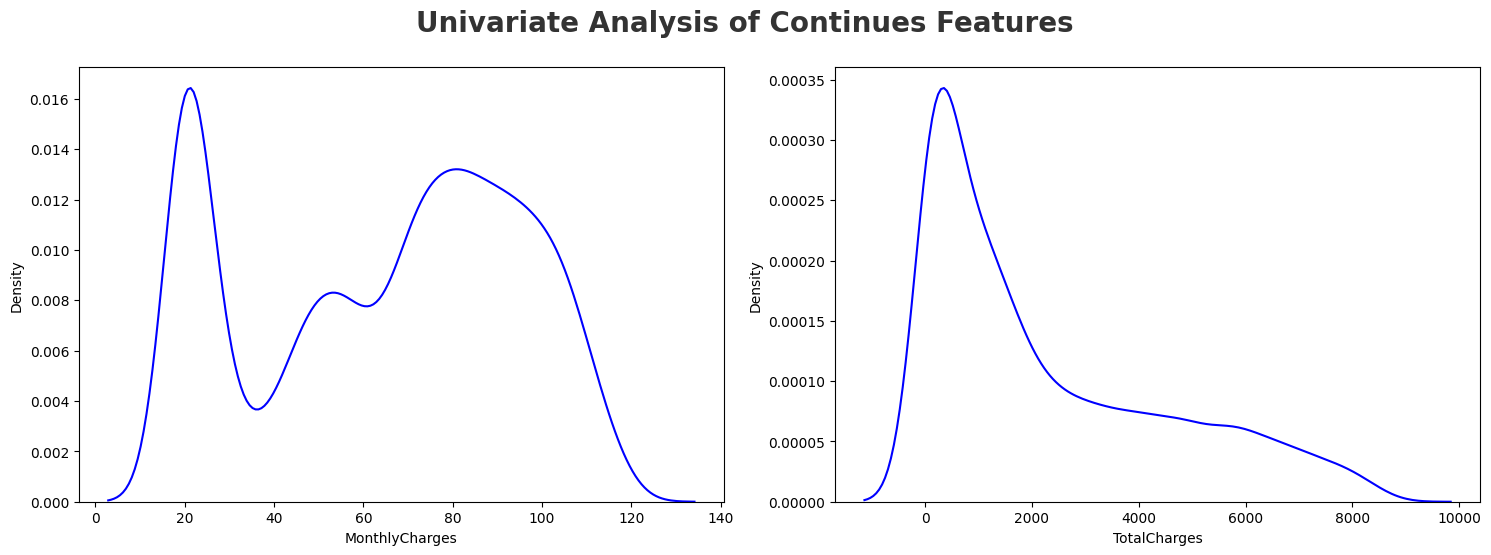

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Continues Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(continue_feature)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[continue_feature[i]], color='blue')
    plt.xlabel(continue_feature[i])
    plt.tight_layout()

In [17]:
skew_value = df['tenure'].skew()
print("Skewness:", round(skew_value,2))


Skewness: 0.24


In [18]:
for i in numerical_feature:
    skew_data = df[i].skew()
    print(f"For {i} the skew: {skew_data}")

For SeniorCitizen the skew: 1.8311025436022044
For tenure the skew: 0.23773083190513133


In [19]:
for i in continue_feature:
    skew_data = df[i].skew()
    print(f"For {i} the skew: {skew_data}")

For MonthlyCharges the skew: -0.22210292770166232
For TotalCharges the skew: 0.9616424997242504


Only TotalCharges columns should be transform using power transform

In [20]:
for col in category_feature:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64
---------------------------
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64
---------------------------
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64
---------------------------
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64
---------------------------
MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64
---------------------------
InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64
---------------------------
OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: proportion, dtype: float64
---------------------------
OnlineBackup
No                     43.899317
Yes                    34.485210
No int

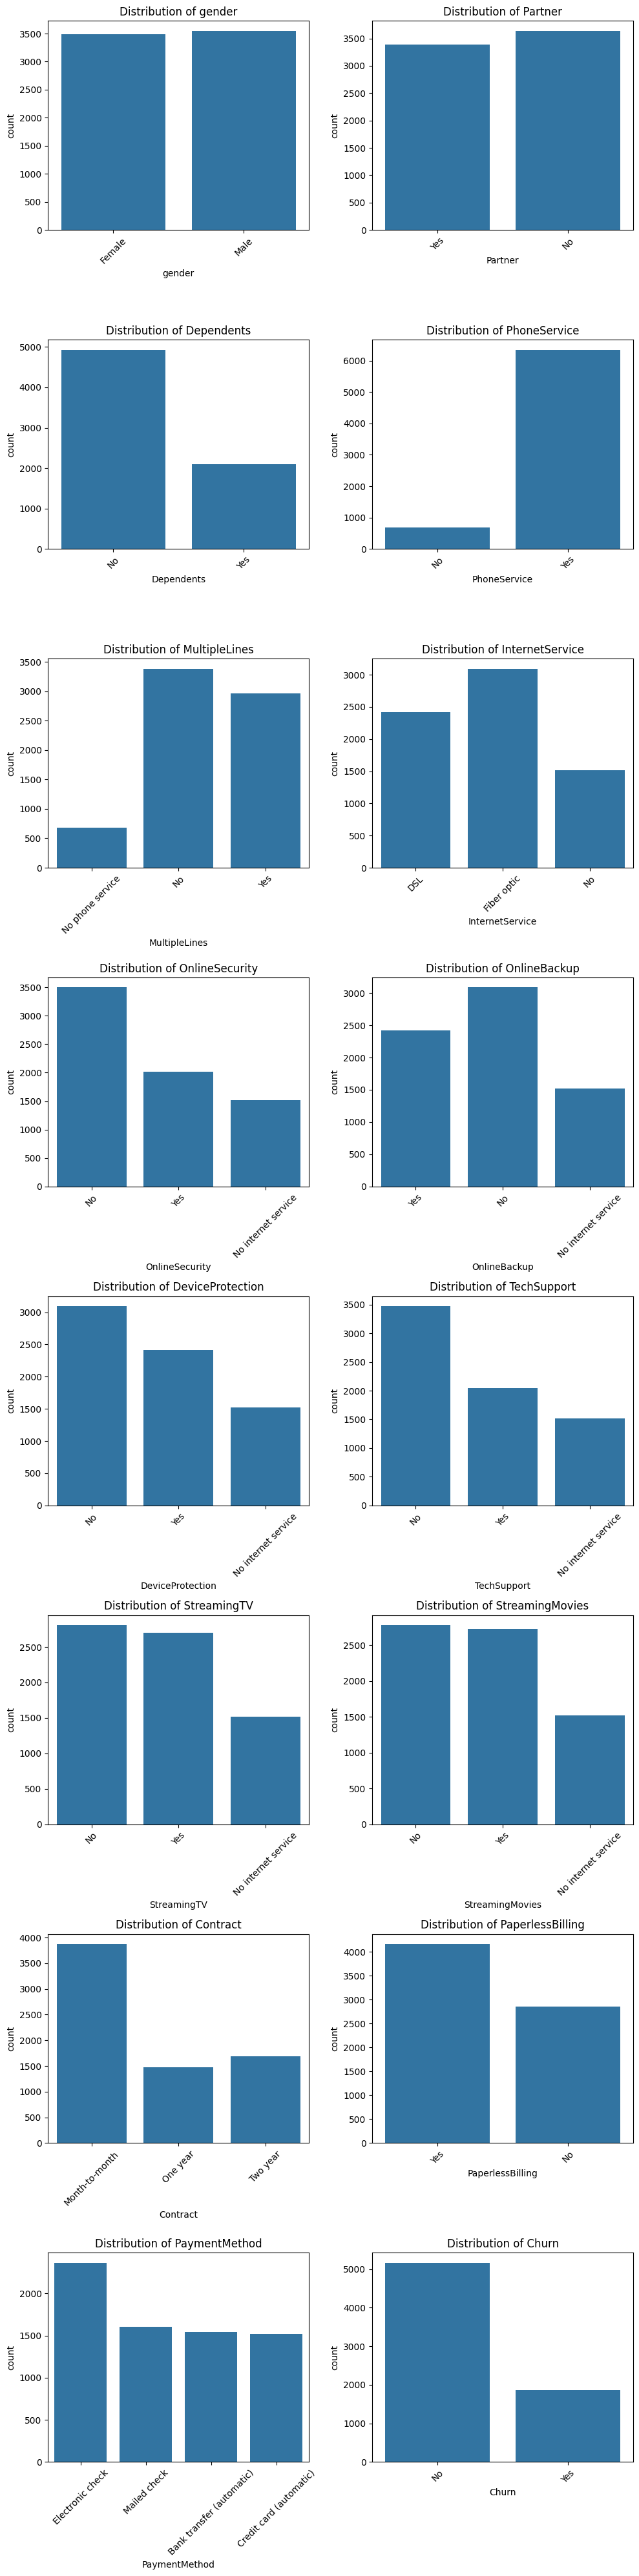

In [21]:
rows = 8
cols = 2

fig,ax = plt.subplots(rows, cols, figsize=(10,40))
ax = ax.flatten()

for i,cat in enumerate(category_feature):
    sns.countplot(data=df, x=cat, ax=ax[i])
    ax[i].set_title(f'Distribution of {cat}', fontsize=12)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

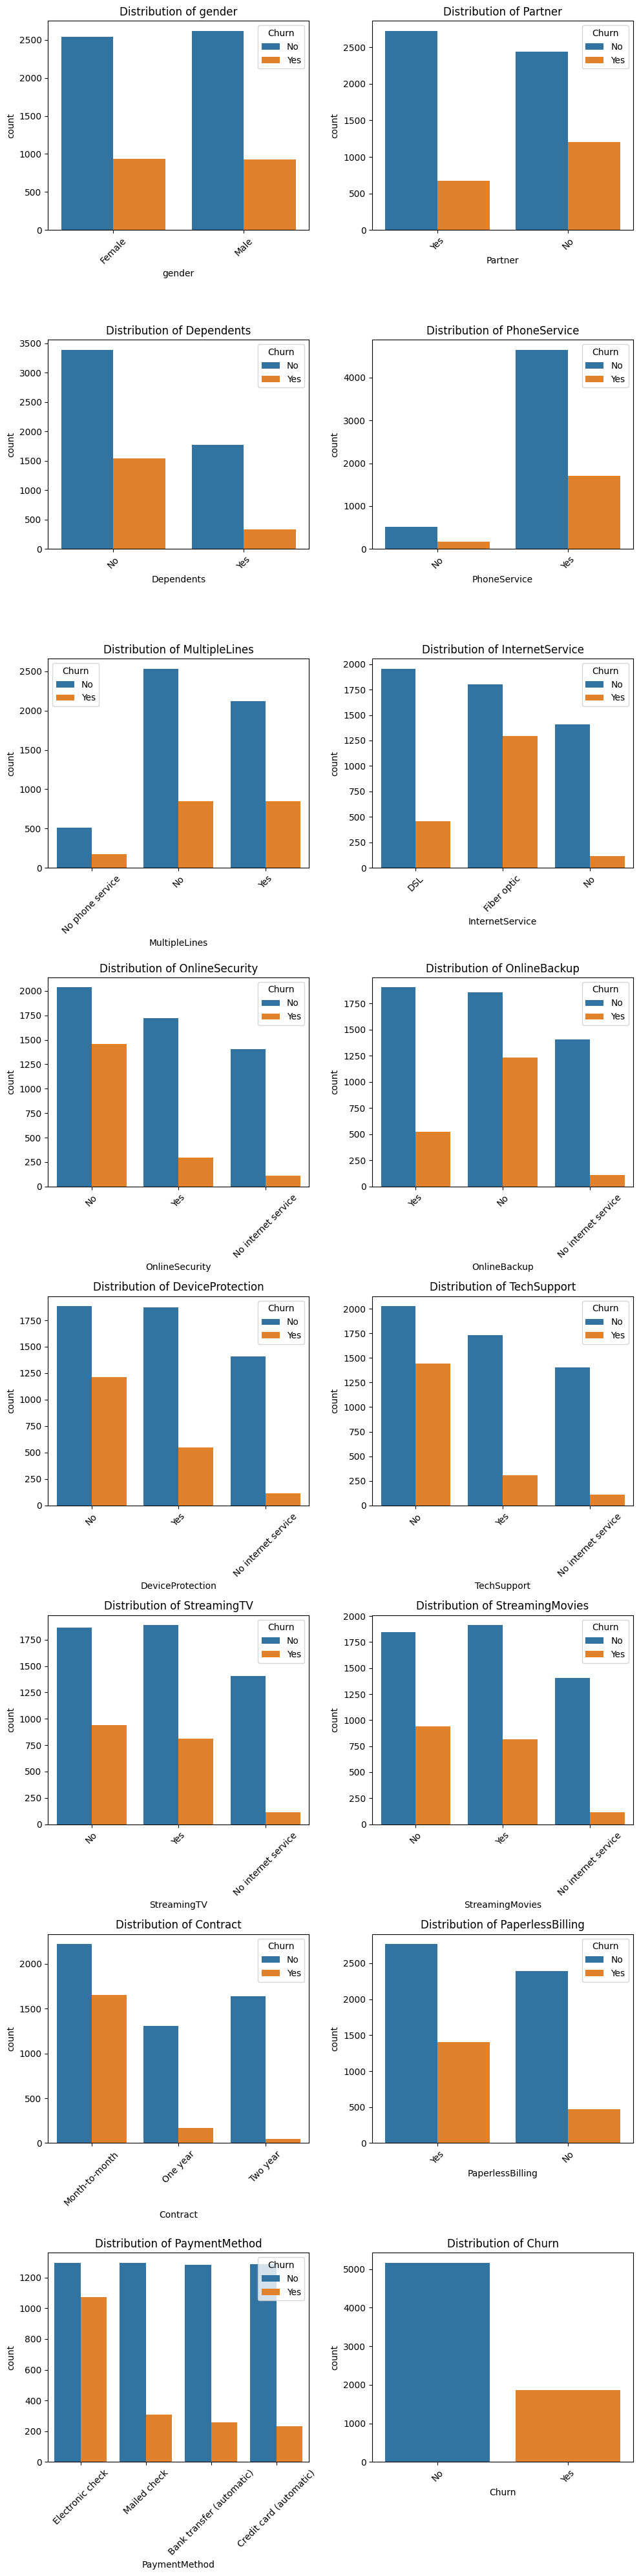

In [22]:
rows = 8
cols = 2

fig,ax = plt.subplots(rows, cols, figsize=(10,40))
ax = ax.flatten()

for i,cat in enumerate(category_feature):
    sns.countplot(data=df, x=cat, hue='Churn',ax=ax[i])
    ax[i].set_title(f'Distribution of {cat}', fontsize=12)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in category_feature:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[category_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


C:\Users\HP\AppData\Local\Temp\ipykernel_16708\1553827242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_16708\1553827242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col,  palette=clr1, ax=ax[i,0])


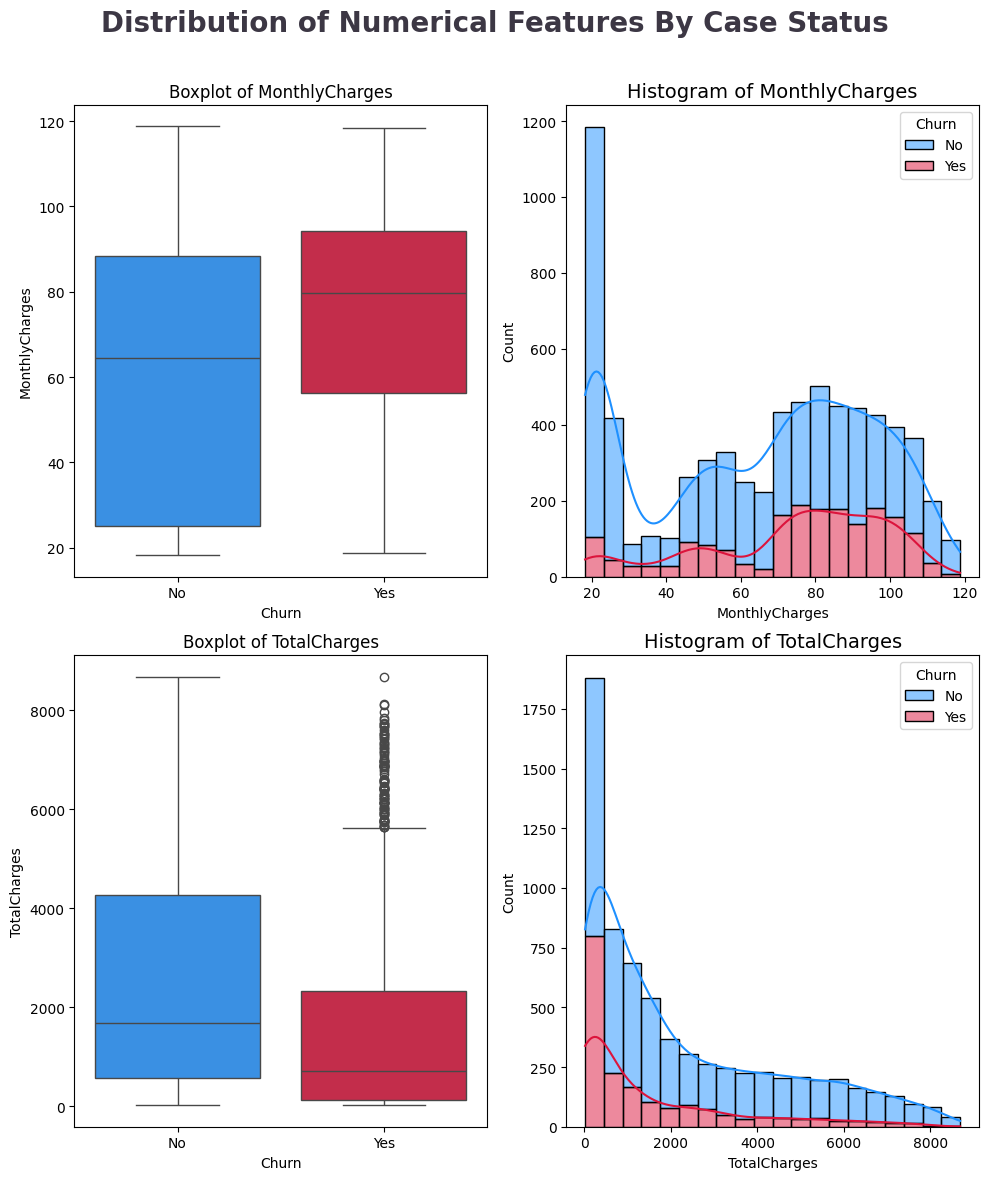

In [24]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continue_feature):   
    sns.boxplot(data=df, x='Churn', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

<Axes: ylabel='count'>

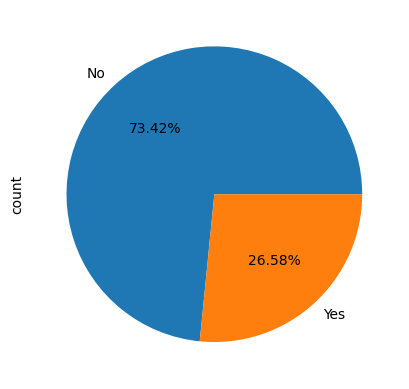

In [25]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')

Our target columns is Imbalance

In [26]:
df.groupby('Partner')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
Partner Churn            
No      No      67.023908
        Yes     32.976092
Yes     No      80.282935
        Yes     19.717065

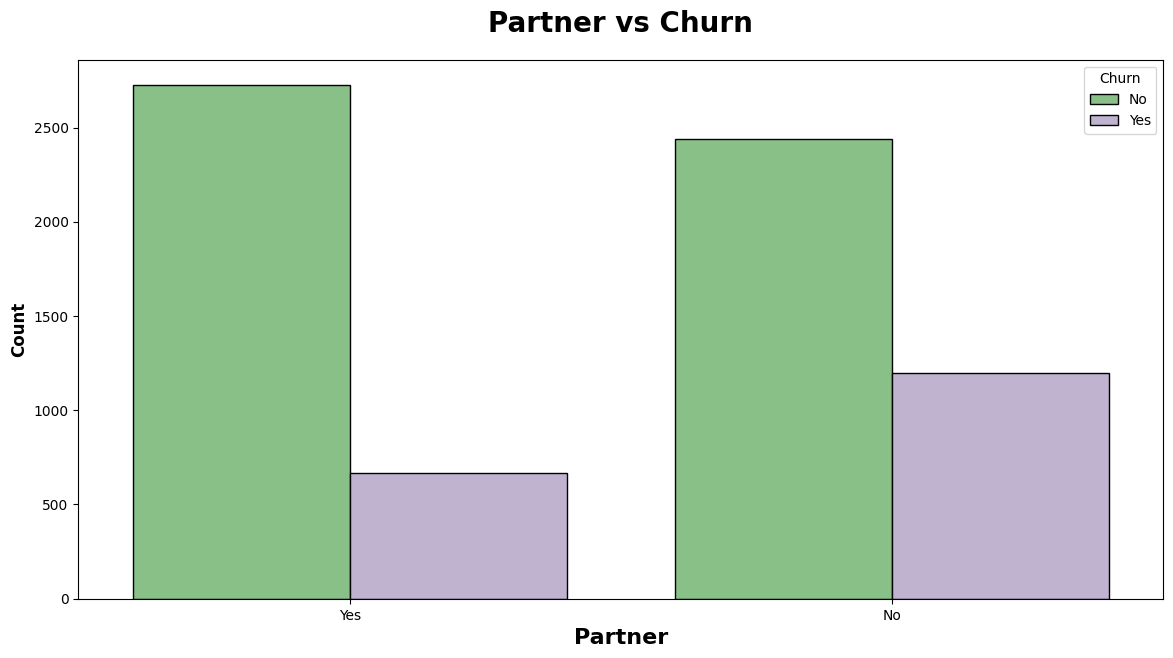

In [27]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Partner",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("Partner vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Partner", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

In [28]:
df2 = df.copy()

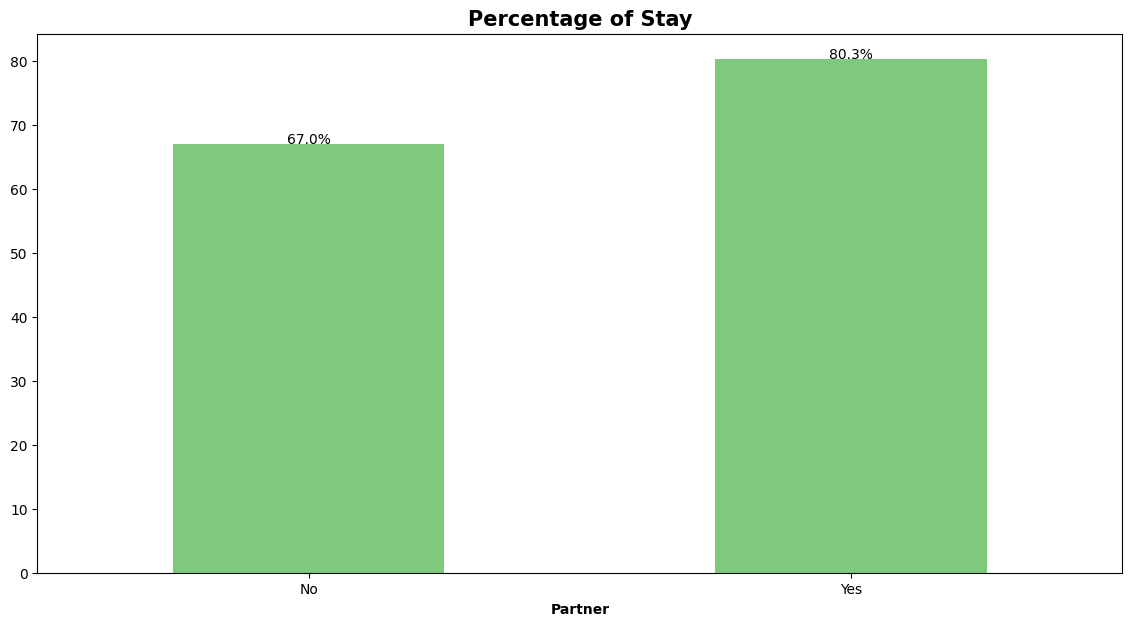

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['Partner'].value_counts()/df2['Partner'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['Partner'].value_counts()/df2['Partner'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Partner' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Among customers with no partner, about 67% stayed, 33% churned.

Among customers with a partner, about 80% stayed, 20% churned.

In [30]:
df.groupby('Dependents')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
Dependents Churn            
No         No      68.720860
           Yes     31.279140
Yes        No      84.468795
           Yes     15.531205

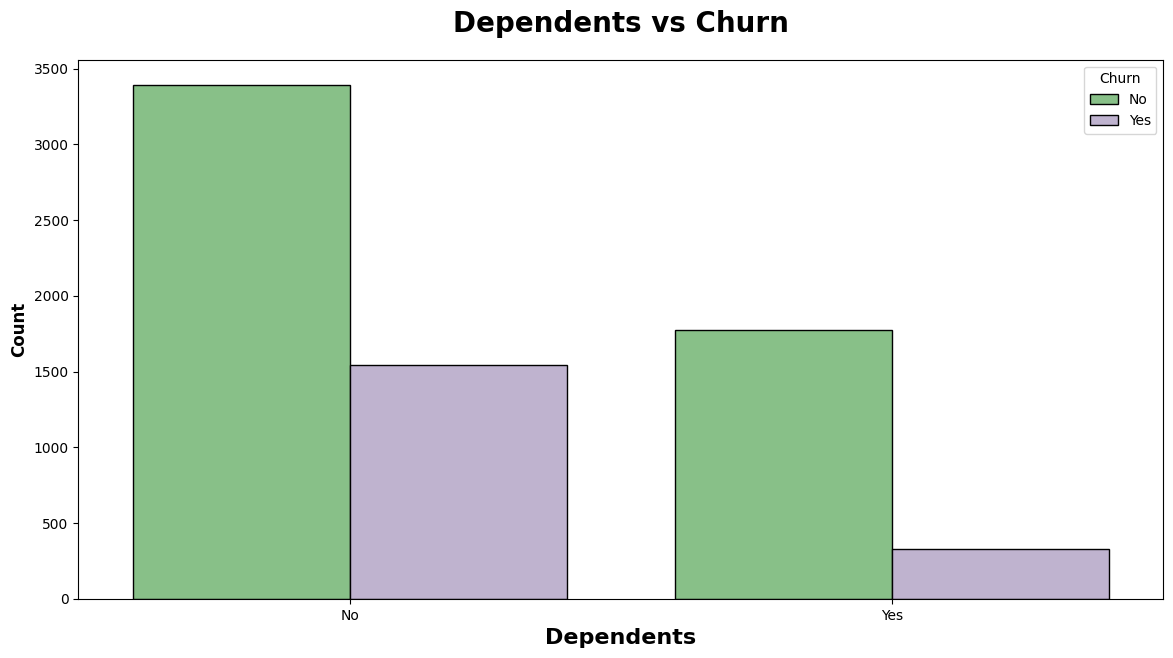

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Dependents",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("Dependents vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Dependents", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

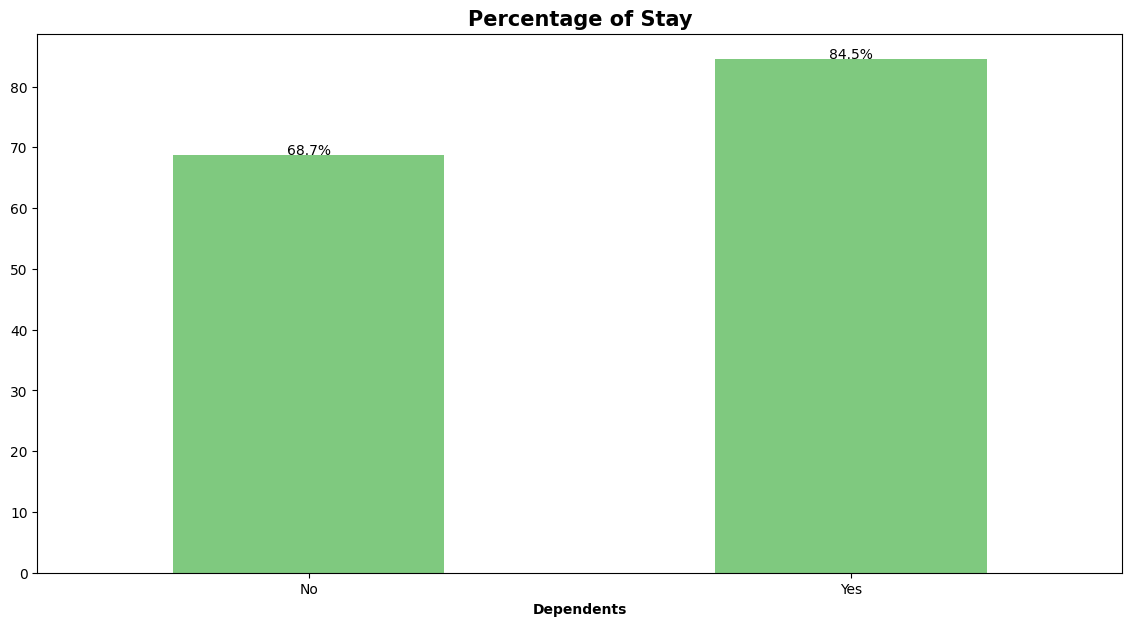

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['Dependents'].value_counts()/df2['Dependents'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['Dependents'].value_counts()/df2['Dependents'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Dependents' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Among customers with no Dependents, about 68.7% stayed, 31.2% churned.

Among customers with a Dependents, about 84.5% stayed, 15.5% churned.

In [33]:
df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
MultipleLines    Churn            
No               No      74.918759
                 Yes     25.081241
No phone service No      75.000000
                 Yes     25.000000
Yes              No      71.351534
                 Yes     28.648466

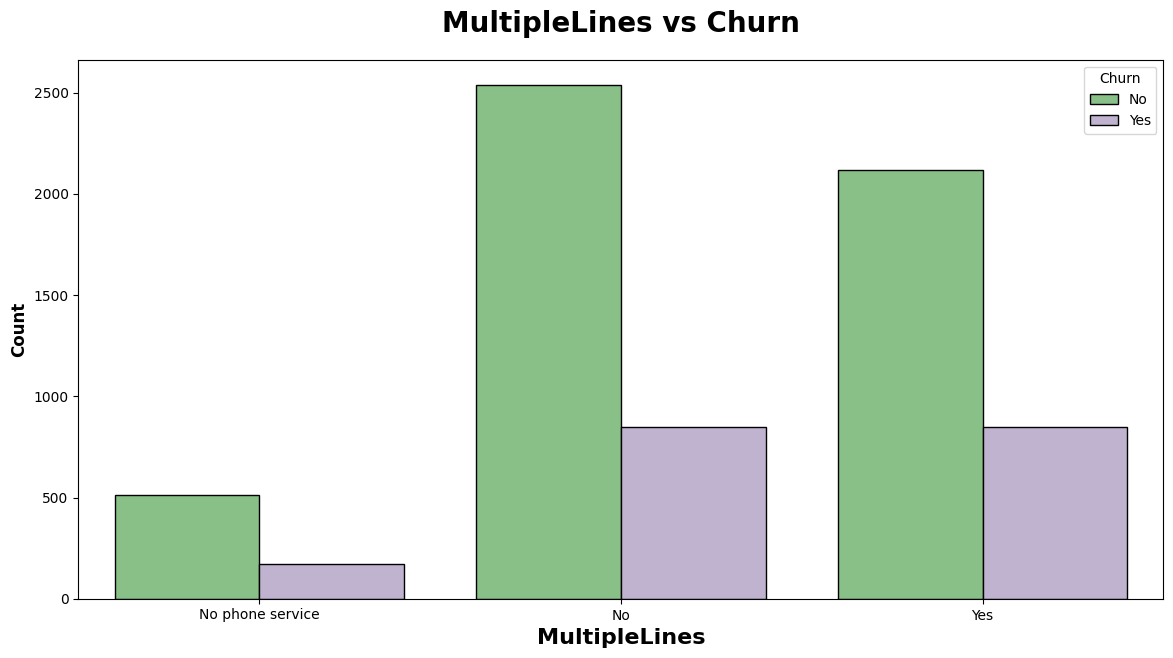

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x="MultipleLines",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("MultipleLines vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("MultipleLines", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

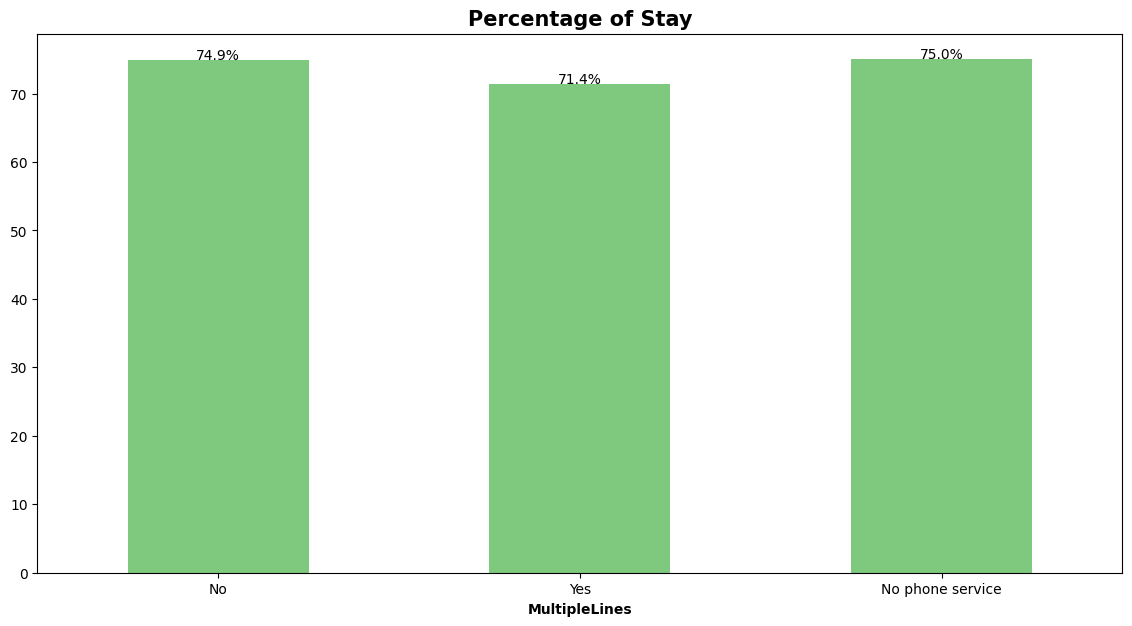

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['MultipleLines'].value_counts()/df2['MultipleLines'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['MultipleLines'].value_counts()/df2['MultipleLines'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('MultipleLines' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [36]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
InternetService Churn            
DSL             No      81.001656
                Yes     18.998344
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.565789
                Yes      7.434211

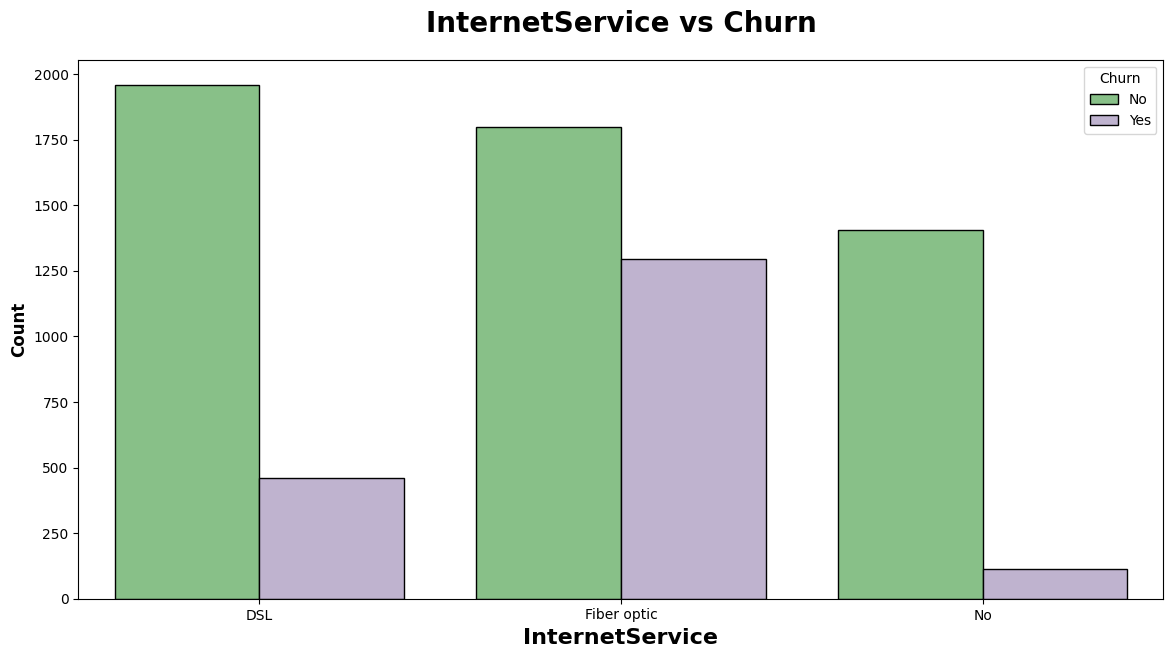

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x="InternetService",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("InternetService vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("InternetService", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

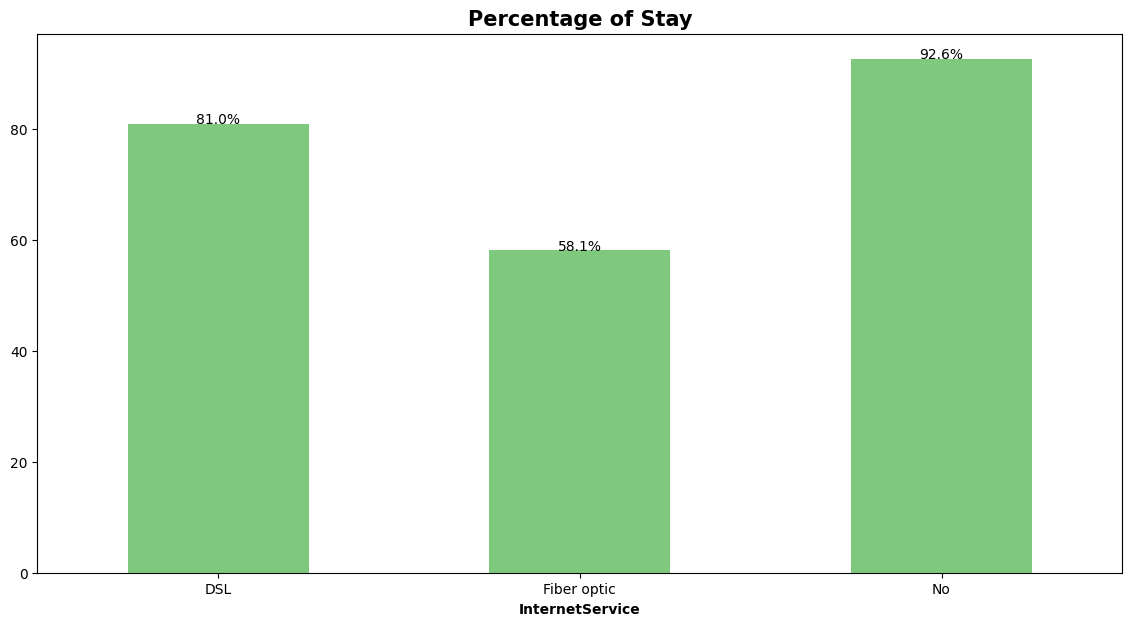

In [38]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['InternetService'].value_counts()/df2['InternetService'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['InternetService'].value_counts()/df2['InternetService'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('InternetService' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [39]:
df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
OnlineSecurity      Churn            
No                  No      58.221333
                    Yes     41.778667
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      85.359801
                    Yes     14.640199

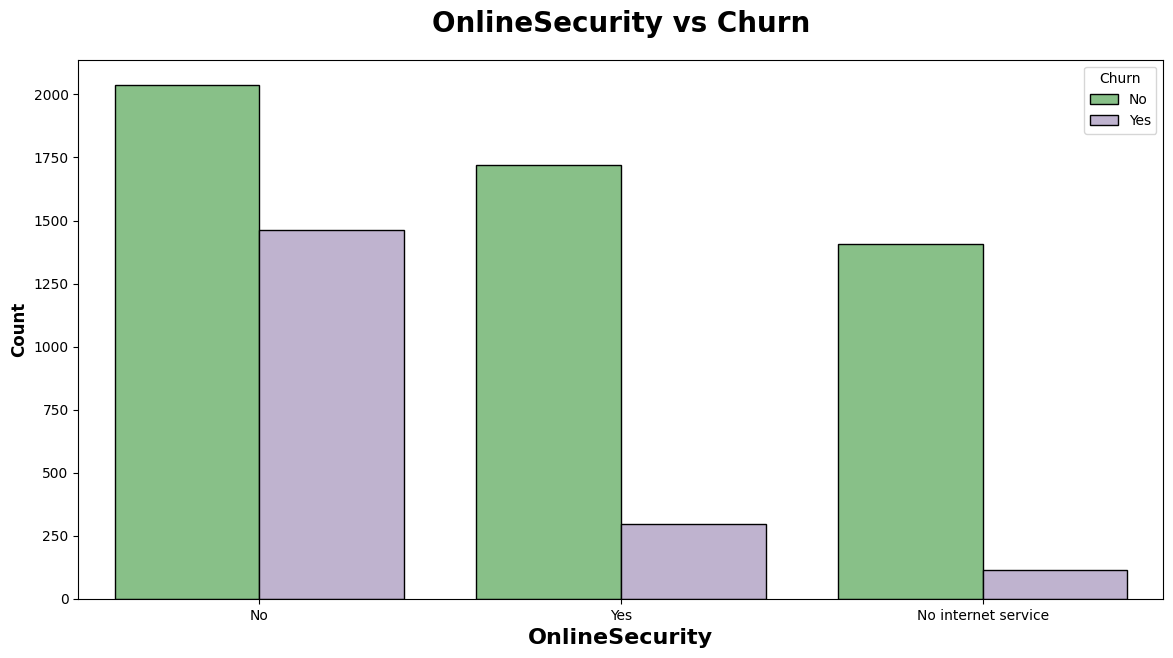

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="OnlineSecurity",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("OnlineSecurity vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("OnlineSecurity", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

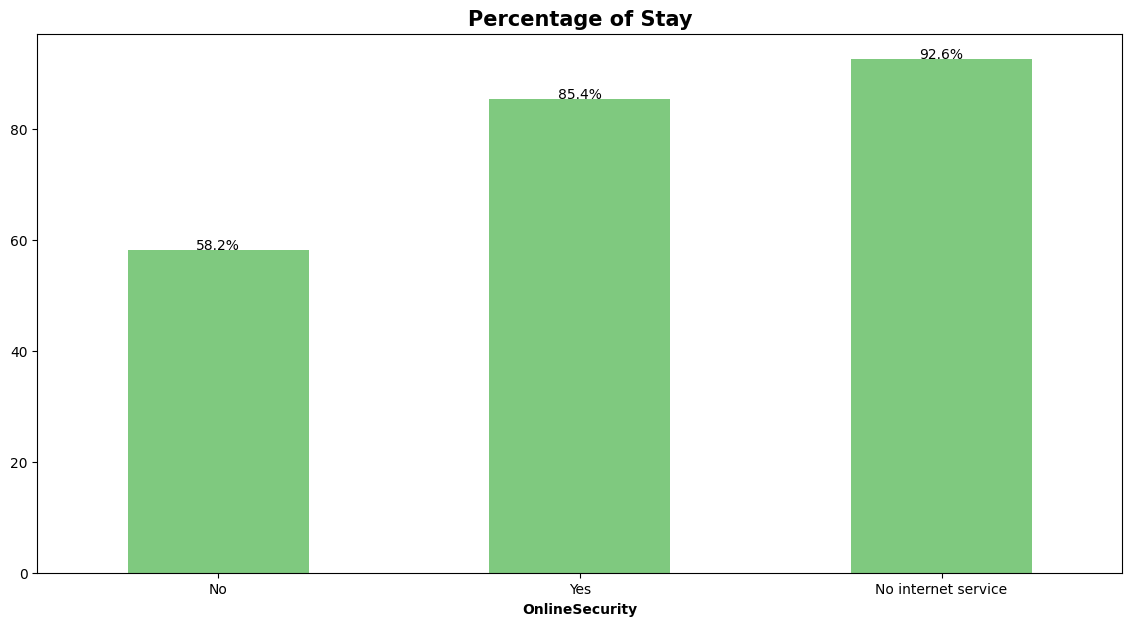

In [41]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['OnlineSecurity'].value_counts()/df2['OnlineSecurity'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['OnlineSecurity'].value_counts()/df2['OnlineSecurity'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('OnlineSecurity' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [42]:
df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
OnlineBackup        Churn            
No                  No      60.058309
                    Yes     39.941691
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      78.432990
                    Yes     21.567010

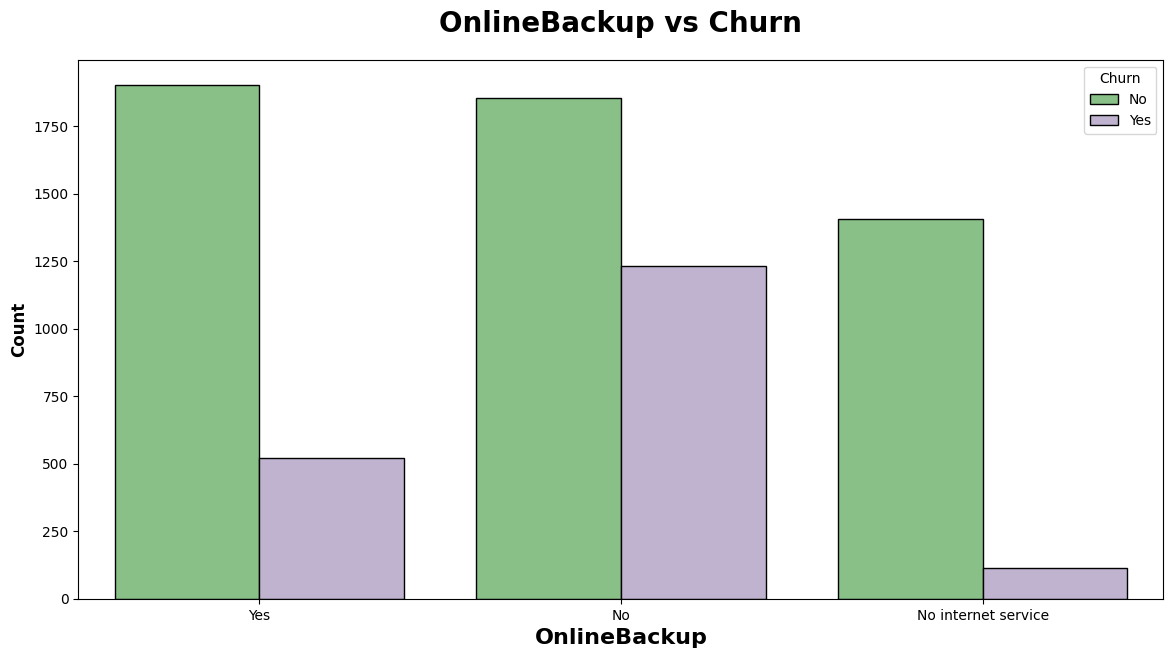

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x="OnlineBackup",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("OnlineBackup vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("OnlineBackup", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

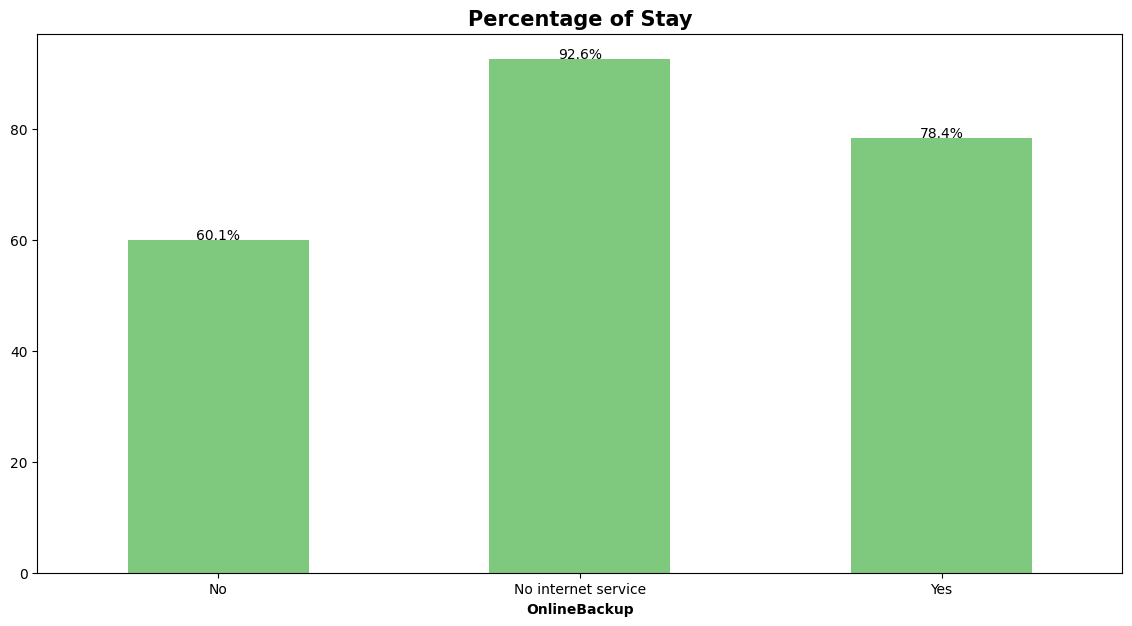

In [44]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['OnlineBackup'].value_counts()/df2['OnlineBackup'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['OnlineBackup'].value_counts()/df2['OnlineBackup'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('OnlineBackup' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [45]:
df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
DeviceProtection    Churn            
No                  No      60.859729
                    Yes     39.140271
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      77.460711
                    Yes     22.539289

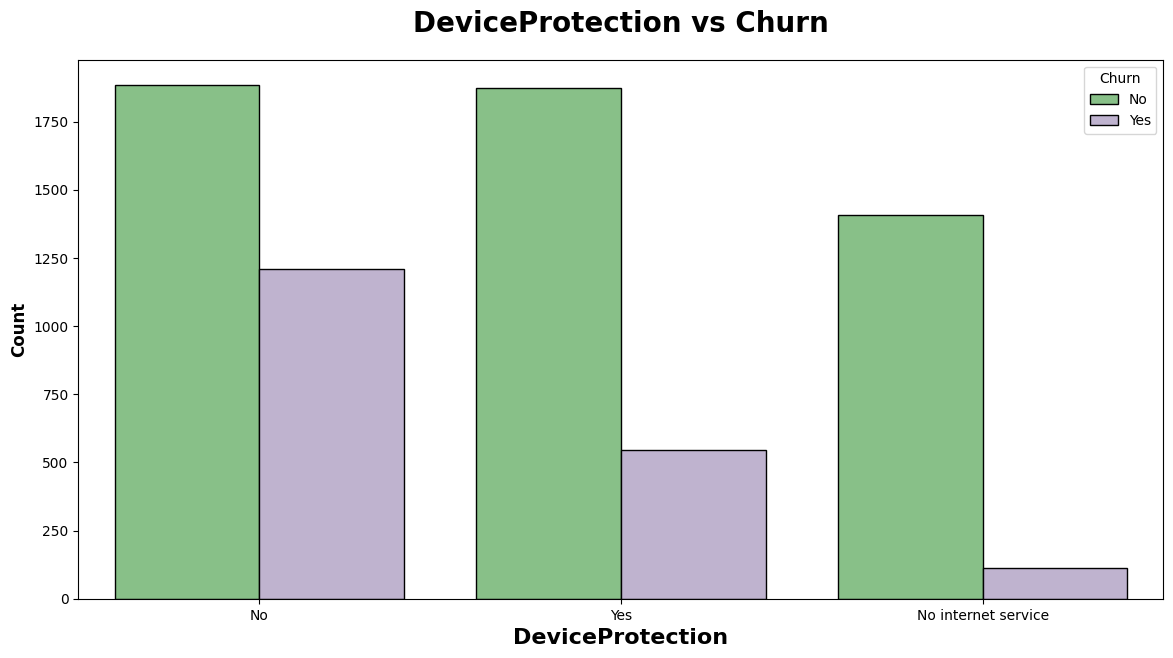

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x="DeviceProtection",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("DeviceProtection vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("DeviceProtection", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

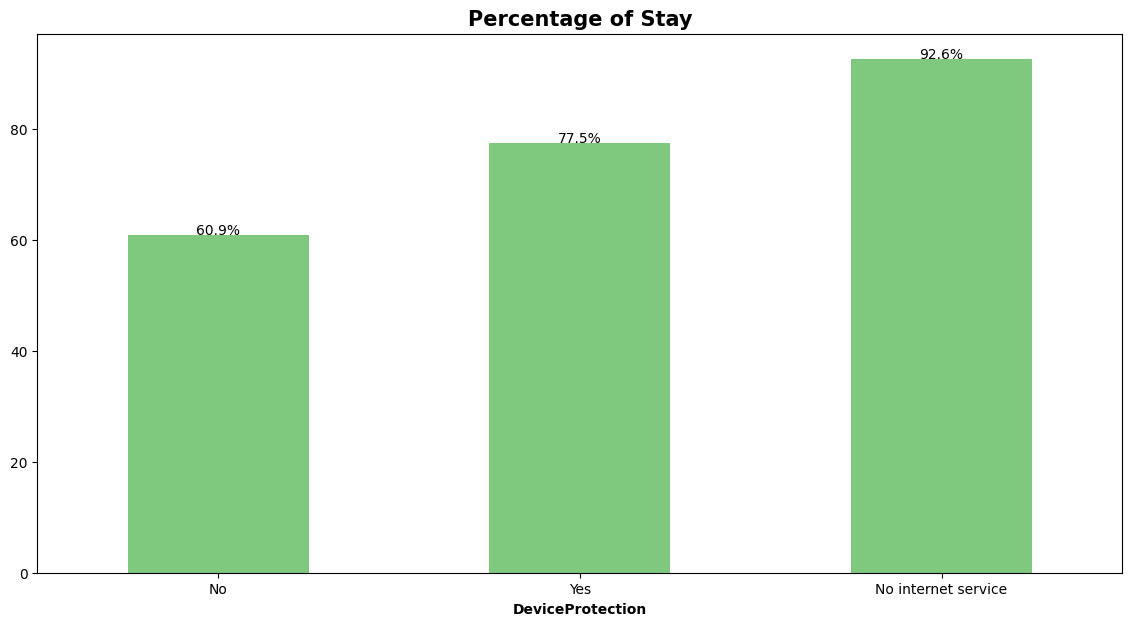

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['DeviceProtection'].value_counts()/df2['DeviceProtection'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['DeviceProtection'].value_counts()/df2['DeviceProtection'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('DeviceProtection' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [48]:
df.groupby('TechSupport')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
TechSupport         Churn            
No                  No      58.352535
                    Yes     41.647465
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      84.803922
                    Yes     15.196078

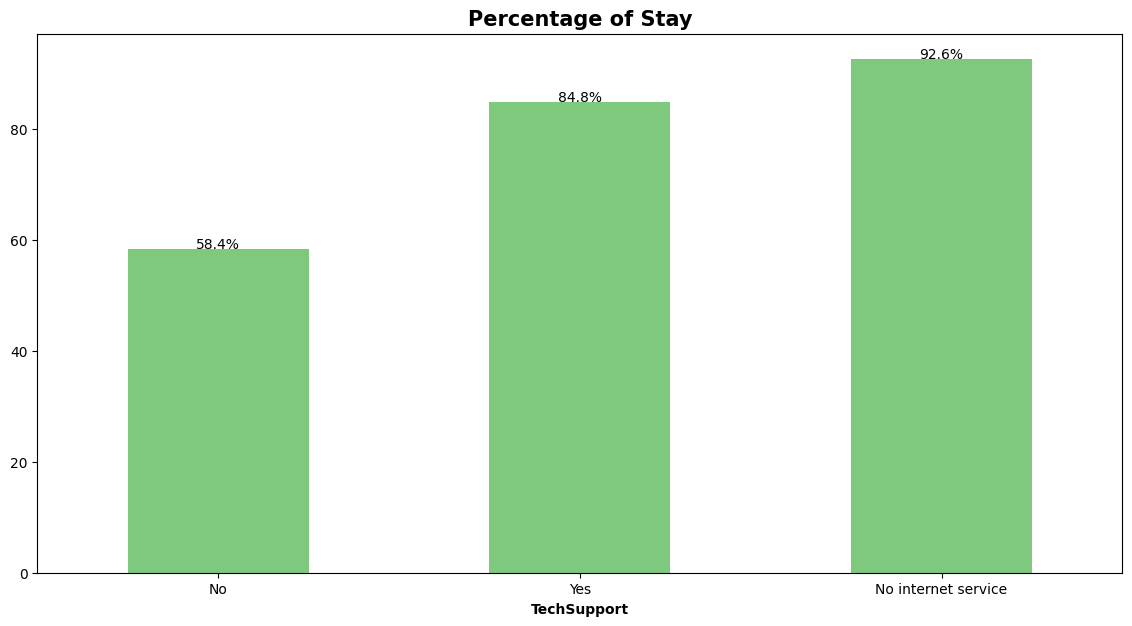

In [49]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['TechSupport'].value_counts()/df2['TechSupport'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['TechSupport'].value_counts()/df2['TechSupport'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('TechSupport' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [50]:
df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
StreamingTV         Churn            
No                  No      66.464934
                    Yes     33.535066
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      69.885313
                    Yes     30.114687

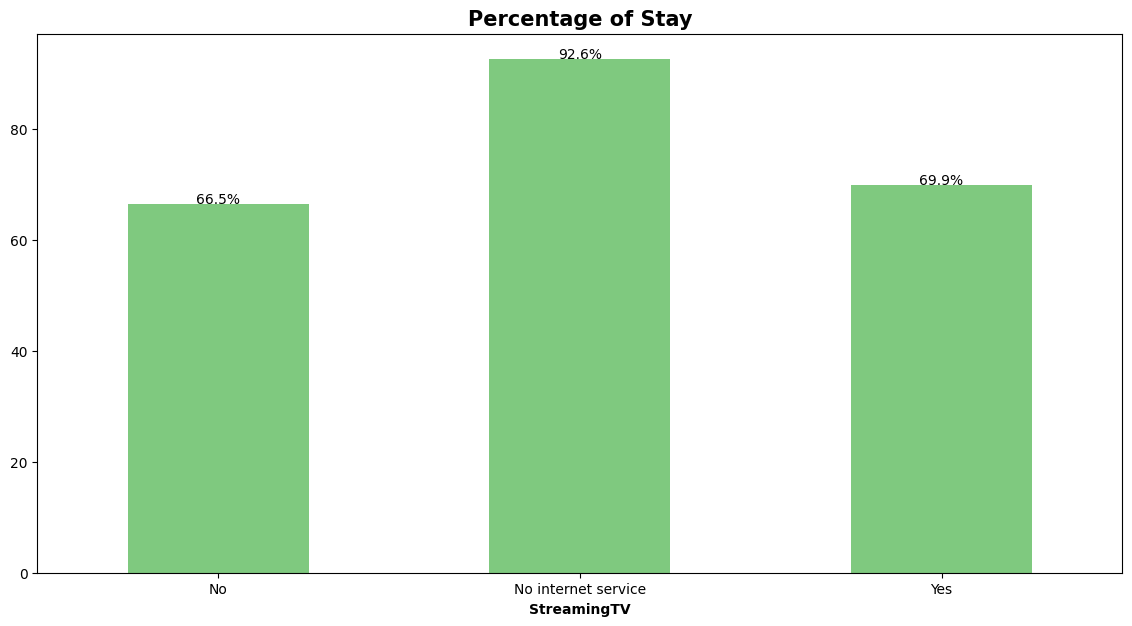

In [51]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['StreamingTV'].value_counts()/df2['StreamingTV'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['StreamingTV'].value_counts()/df2['StreamingTV'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('StreamingTV' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [52]:
df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
StreamingMovies     Churn            
No                  No      66.271125
                    Yes     33.728875
No internet service No      92.565789
                    Yes      7.434211
Yes                 No      70.047602
                    Yes     29.952398

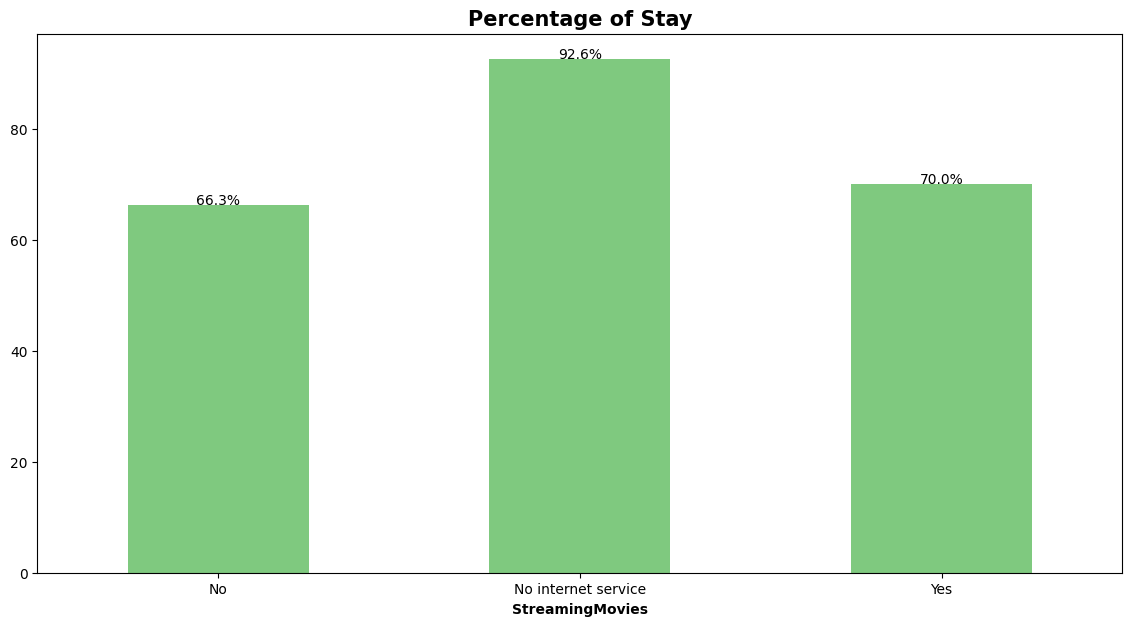

In [53]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['StreamingMovies'].value_counts()/df2['StreamingMovies'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['StreamingMovies'].value_counts()/df2['StreamingMovies'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('StreamingMovies' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [54]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.722826
               Yes     11.277174
Two year       No      97.151335
               Yes      2.848665

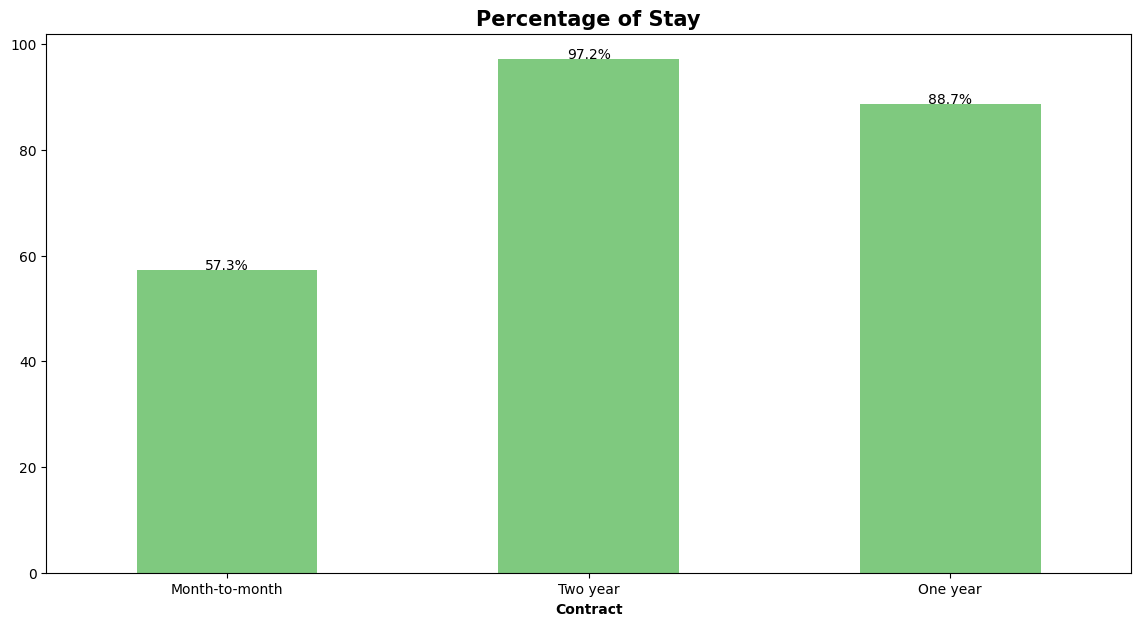

In [55]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['Contract'].value_counts()/df2['Contract'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['Contract'].value_counts()/df2['Contract'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Contract' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [56]:
df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
PaperlessBilling Churn            
No               No      83.624302
                 Yes     16.375698
Yes              No      66.410749
                 Yes     33.589251

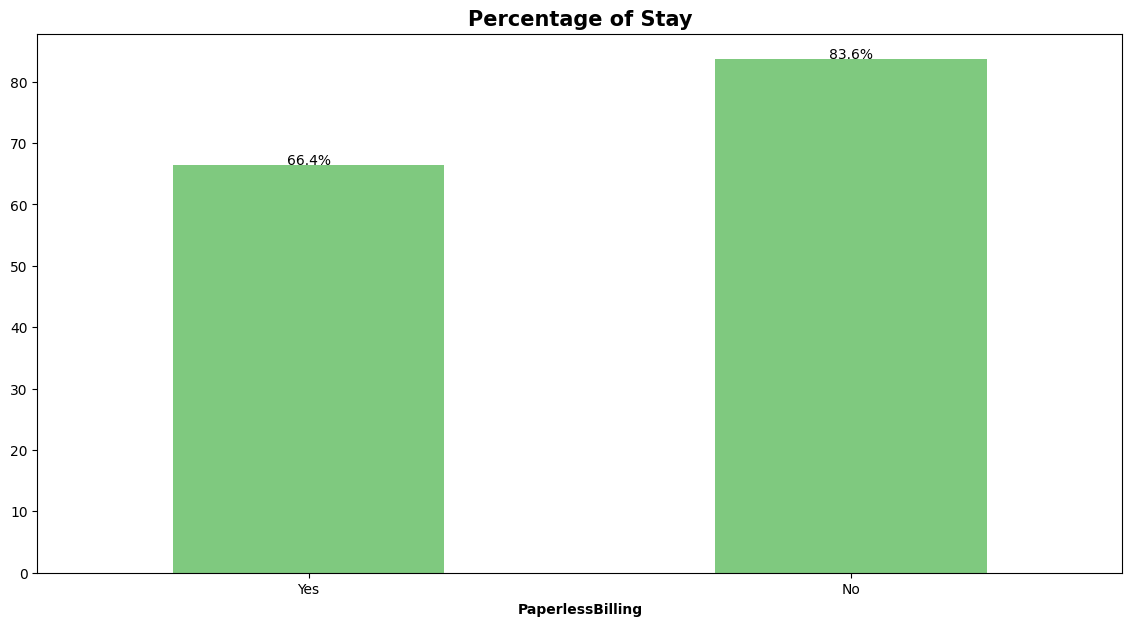

In [57]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['PaperlessBilling'].value_counts()/df2['PaperlessBilling'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['PaperlessBilling'].value_counts()/df2['PaperlessBilling'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('PaperlessBilling' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [58]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
PaymentMethod             Churn            
Bank transfer (automatic) No      83.268482
                          Yes     16.731518
Credit card (automatic)   No      84.746877
                          Yes     15.253123
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.798005
                          Yes     19.201995

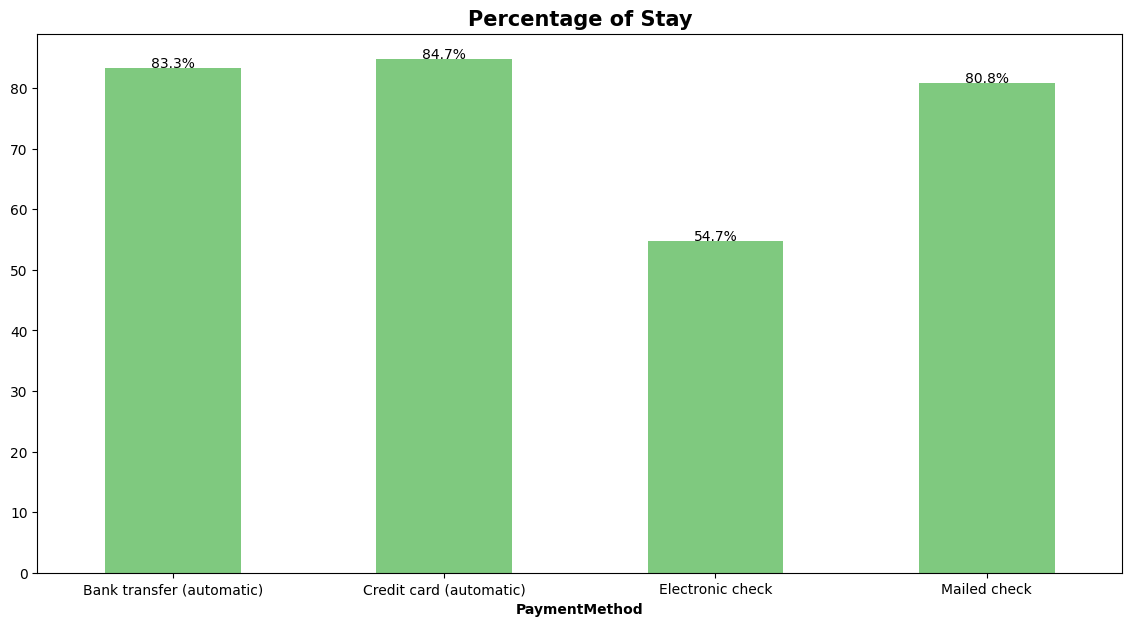

In [59]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['No'])]['PaymentMethod'].value_counts()/df2['PaymentMethod'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Stay" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['No'])]['PaymentMethod'].value_counts()/df2['PaymentMethod'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('PaymentMethod' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [61]:
df.groupby('Churn')['MonthlyCharges'].mean().to_frame().sort_values(by='MonthlyCharges',ascending=False)

,MonthlyCharges
Churn,
Yes,74.441332
No,61.307408


In [62]:
df.groupby('Churn')['TotalCharges'].mean().to_frame().sort_values(by='TotalCharges',ascending=False)

,TotalCharges
Churn,
No,2555.344141
Yes,1531.796094


Customers who churn pay more per month but don’t stay long, so total value is less.

Customers who stay pay less per month, but over time they add up to higher total revenue.

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_16708\1013833259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Churn",x = "MonthlyCharges", data=df,palette='bright')


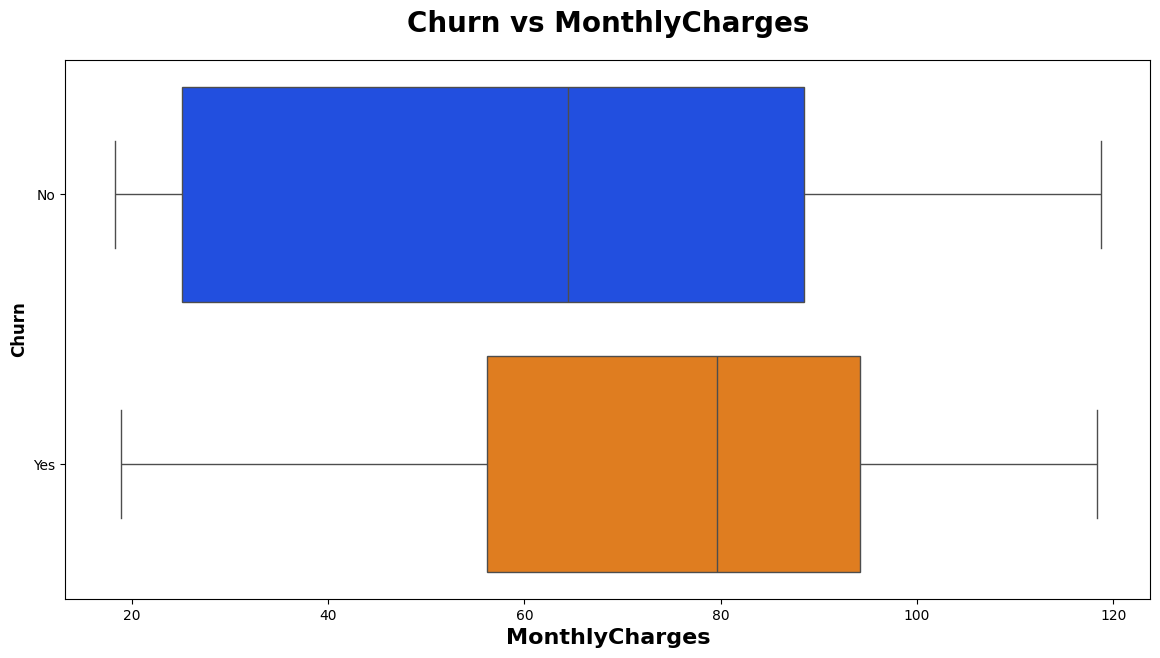

In [63]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="Churn",x = "MonthlyCharges", data=df,palette='bright')
plt.title("Churn vs MonthlyCharges", weight="bold",fontsize=20, pad=20)
plt.xlabel("MonthlyCharges", weight="bold", fontsize=16)
plt.ylabel("Churn", weight="bold", fontsize=12)
plt.show()

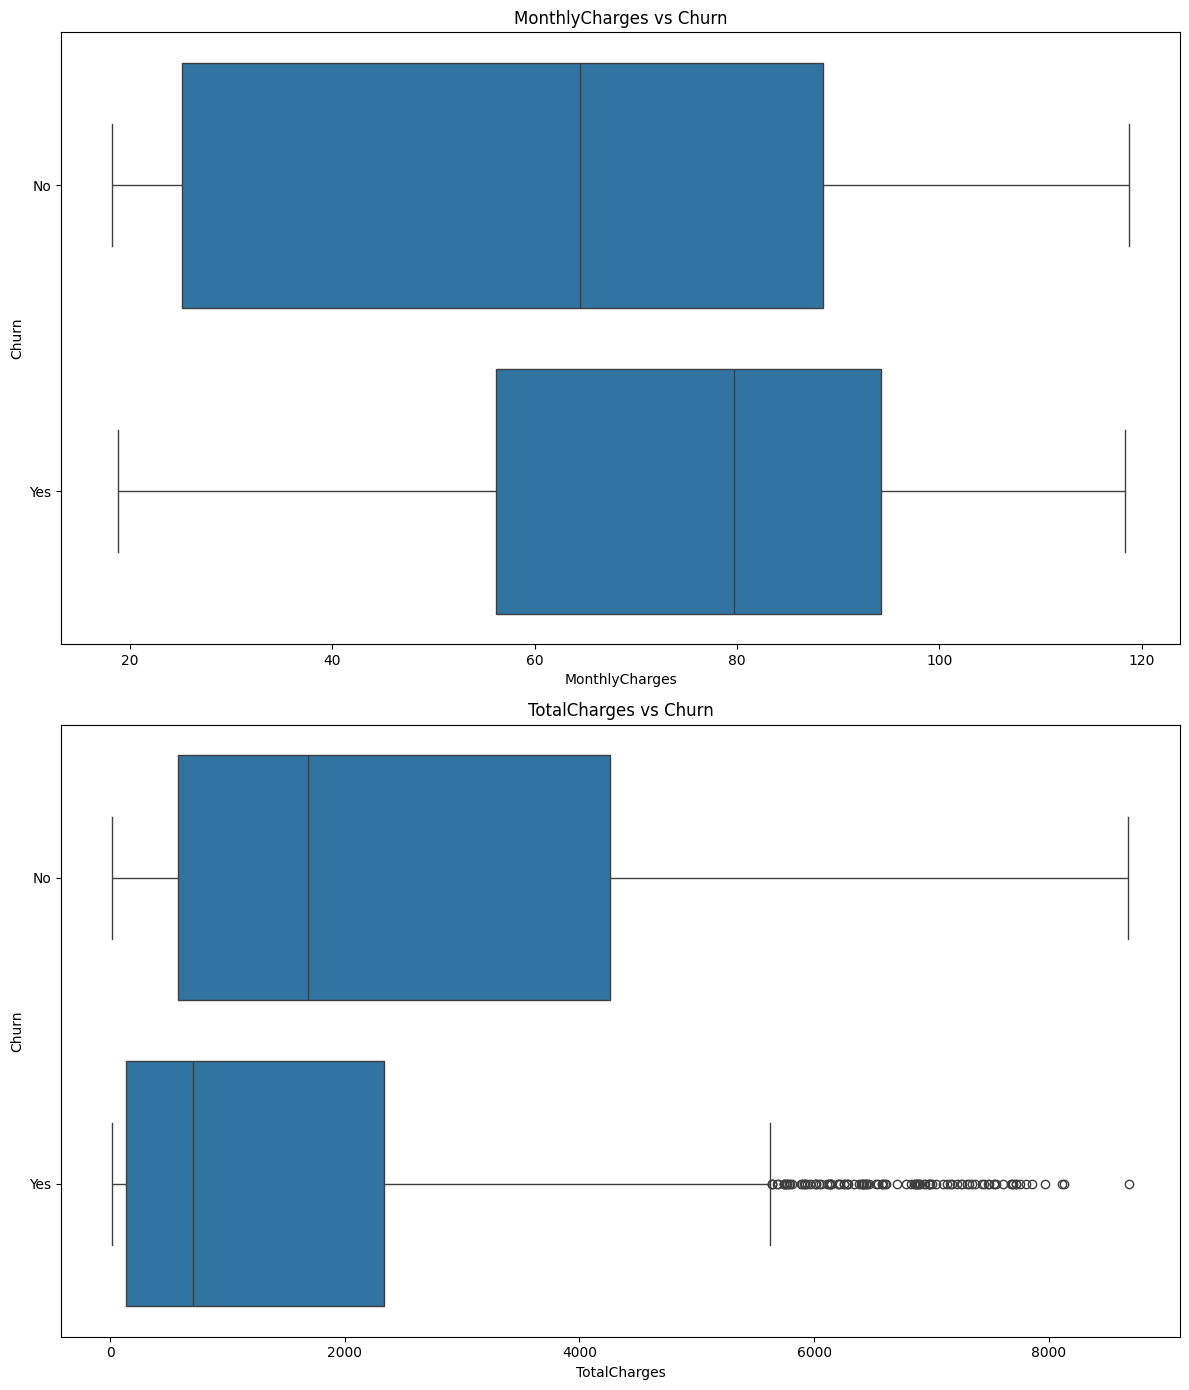

In [70]:
rows = 2
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(12, 14))
ax = ax.flatten()

for i, num in enumerate(continue_feature):
    sns.boxplot(data=df, y="Churn", x=num, ax=ax[i])
    ax[i].set_title(f"{num} vs Churn")  # Optional: Add a title for clarity

plt.tight_layout()
plt.show()

1) Drop gender, PhoneService
2) power tranform to TotalCharge
3) if needed we can also drop Multiline service